In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

sns.set_theme(style="darkgrid")

#### Dataset
https://in.finance.yahoo.com/quote/%5EGSPC/history?period1=536371200&period2=567907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [37]:
sp_data = pd.read_csv('datasets/SP_500_1987.csv')

sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


#### Describe

In [21]:
sp_data.describe()

,Open,High,Low,Close,AdjClose
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,286.964466,289.328063,284.412095,286.978617,286.978617
std,28.923683,28.241142,29.535528,28.889053,28.889053
min,223.980000,225.770000,216.460000,223.920000,223.920000
25%,267.840000,270.400000,264.310000,267.840000,267.840000
50%,290.520000,292.470000,288.340000,290.520000,290.520000
75%,308.940000,310.270000,307.420000,308.960000,308.960000
max,336.770000,337.890000,334.460000,336.770000,336.770000


#### Check type of columns of data

In [22]:
sp_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume       object
dtype: object

#### Converting the date column to pandas datetime

In [23]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

* We can just see the data throught the plot
* Here you can see that, there is a huge fall

Text(0.5, 1.0, 'S&P 500 1987')

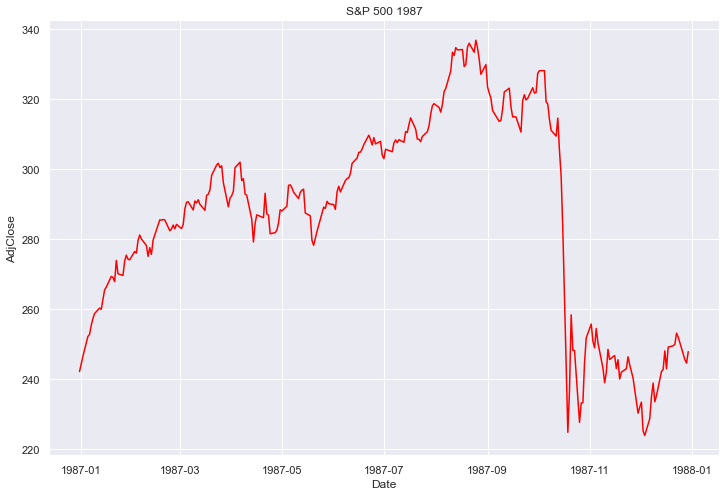

In [24]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sp_data, x='Date', y='AdjClose', color='red')

plt.title('S&P 500 1987')

* Here we are finding the percentage change between the current and a prior element

In [25]:
sp_data['Returns'] = sp_data['AdjClose'].pct_change()

sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
0,1986-12-31,243.37,244.03,241.28,242.17,242.17,"13,92,00,000",NaN
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088


In [26]:
sp_data = sp_data.dropna()

sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088
5,1987-01-08,255.36,257.28,254.97,257.28,257.28,"19,45,00,000",0.007637


* From this data we can see that only one data had nan values

In [27]:
sp_data.shape

(252, 8)

#### Skewness

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_skewness.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_kurtosis.html

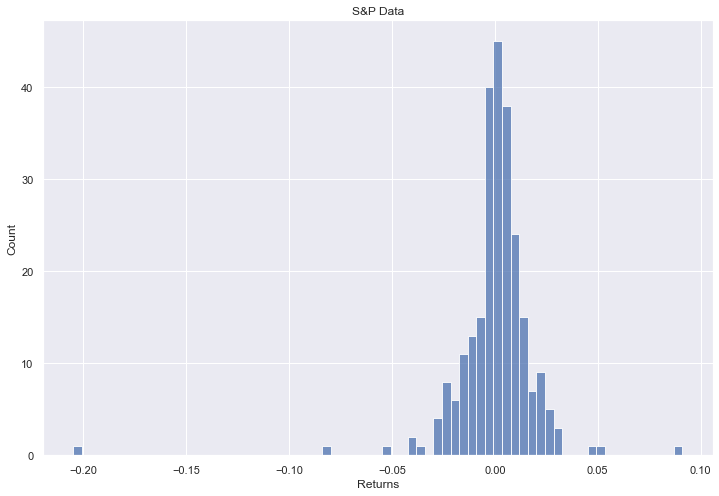

In [28]:
plt.figure(figsize=(12, 8))

sns.histplot(data=sp_data, x='Returns')

plt.title('S&P Data')

plt.show()

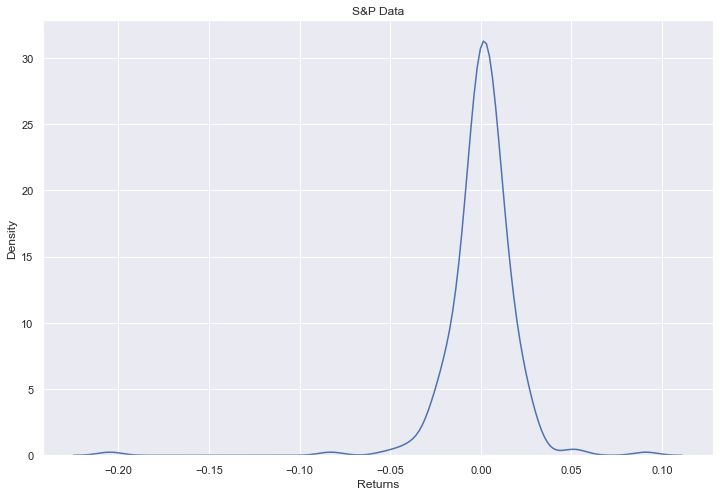

In [29]:
plt.figure(figsize=(12, 8))

sns.kdeplot(data=sp_data, x='Returns')

plt.title('S&P Data')

plt.show()

#### Skewness
* Using pandas

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. ... Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

In [30]:
sp_data['Returns'].skew(axis=0)

-4.063006900553241

#### Using statsmodels

- The standard skewness estimator.
- Skewness estimator based on quartiles.
- Skewness estimator based on mean-median difference, standardized by absolute deviation.
- Skewness estimator based on mean-median difference, standardized by standard deviation.

In [31]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.038782236530137,
 0.033689707286255054,
 -0.11690104948849872,
 -0.06460582304845877)

#### Kurtosis
* Using pandas

The value is often compared to the kurtosis of the normal distribution, which is equal to 3. If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails).

In [32]:
sp_data['Returns'].kurtosis(axis=0)

43.302749862695954

#### Using statsmodels

- The standard kurtosis estimator.
- Kurtosis estimator based on octiles.
- Kurtosis estimators based on exceedence expectations.
- Kurtosis measure based on the spread between high and low quantiles.

In [33]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'], excess=True)

(42.42461267897301, 0.5260629102317422, 1.1767790081095497, 1.350873758059222)

#### Remove Oct 19, 1987 when there was a huge fall

In [34]:
sp_data_without_oct19 = sp_data[sp_data['Date'] != '1987-10-19']

sp_data_without_oct19.shape

(251, 8)

* Now we can see that the skewness and kurtosis value has changed

In [35]:
sm.stats.stattools.robust_skewness(sp_data_without_oct19['Returns'])

(0.017513164647138143,
 0.04202122301747493,
 -0.04955418277064157,
 -0.03306593887076004)

In [36]:
sm.stats.stattools.robust_kurtosis(sp_data_without_oct19['Returns'], excess=True)

(7.587148622145325, 0.5143641446322276, 0.7746063448479199, 1.299285954181316)